In [ ]:
# Import Libraries for Data Analysis and Clustering  

import numpy as np  # For numerical operations  
import pandas as pd  # For data manipulation  
import matplotlib.pyplot as plt  # For visualization  
from matplotlib.colors import ListedColormap  # For custom colormap  
from sklearn.cluster import KMeans  # For K-Means clustering  

In [ ]:
# Load Dataset and Preview Data  

blobs = pd.read_csv('iris.csv')  # Load the Iris dataset from CSV  
colnames = ['sepal_length', 'sepal_width']  # Define the columns to use  
blobs.head()  # Display the first 5 rows  


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Apply K-Means Clustering  

kmeans = KMeans(n_clusters=3)  # Initialize K-Means with 3 clusters  
blobs['cluster'] = kmeans.fit_predict(blobs[colnames])  # Assign clusters to data  


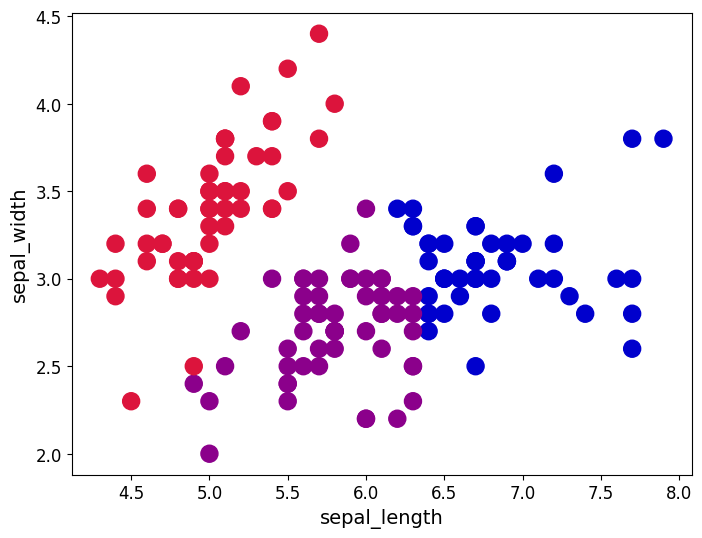

In [ ]:
# Visualize Clustering Results  

customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])  # Define cluster colors  

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure (8x6)  
plt.scatter(x=blobs['sepal_length'], y=blobs['sepal_width'], s=150,  
            c=blobs['cluster'].astype('category'), cmap=customcmap)  # Scatter plot with cluster colors  

ax.set_xlabel(r'sepal_length', fontsize=14)  # X-axis label  
ax.set_ylabel(r'sepal_width', fontsize=14)  # Y-axis label  
plt.xticks(fontsize=12)  # Set font size for X ticks  
plt.yticks(fontsize=12)  # Set font size for Y ticks  

plt.show()  # Display the plot  


In [ ]:
# Function to Initialize Centroids  

def initiate_centroids(k, dset):
    '''
    Select k random data points as initial centroids.
    k: number of centroids
    dset: pandas DataFrame
    '''
    centroids = dset.sample(k)  # Randomly select k data points as centroids  
    return centroids  

# Set Random Seed for Reproducibility  
np.random.seed(42)  

# Define Number of Clusters and Select Features  
k = 3  
df = blobs[['sepal_length', 'sepal_width']]  # Select relevant columns  

# Initialize Centroids  
centroids = initiate_centroids(k, df)  
centroids  # Display initial centroids  


,sepal_length,sepal_width
73,6.1,2.8
18,5.7,3.8
118,7.7,2.6


In [ ]:
# Function to Calculate Root Sum of Squared Errors (RSS Error)  

def rsserr(a, b):  
    '''
    Calculate the root of the sum of squared errors (RSS Error).
    a and b: numpy arrays  
    '''
    return np.square(np.sum((a - b) ** 2))  # Compute squared sum of differences  


In [ ]:
# Calculate Error for Each Centroid  

for i, centroid in enumerate(range(centroids.shape[0])):  
    err = rsserr(centroids.iloc[centroid, :], df.iloc[36, :])  # Compute RSS error for centroid  
    print('Error for centroid {0}: {1:.2f}'.format(i, err))  # Print error value  


Error for centroid 0: 0.72
Error for centroid 1: 0.02
Error for centroid 2: 31.92


In [ ]:
# Function to Assign Data Points to the Nearest Centroid  

def centroid_assignation(dset, centroids):
    '''
    Assign each data point in `dset` to the nearest centroid.  
    - dset: pandas DataFrame with observations  
    - centroids: pandas DataFrame with centroids  
    '''
    k = centroids.shape[0]  # Number of centroids  
    n = dset.shape[0]  # Number of observations  
    assignation = []  # List to store assigned centroid index  
    assign_errors = []  # List to store assignment errors  

    for obs in range(n):
        all_errors = np.array([])  # Array to store errors for all centroids  

        # Compute error for each centroid  
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs, :])  
            all_errors = np.append(all_errors, err)  

        # Find the nearest centroid and its error  
        nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]  
        nearest_centroid_error = np.amin(all_errors)  

        # Store results  
        assignation.append(nearest_centroid)  
        assign_errors.append(nearest_centroid_error)  

    return assignation, assign_errors  # Return assigned centroids and errors  

In [ ]:
# Assign Each Data Point to the Nearest Centroid  

df['centroid'], df['error'] = centroid_assignation(df, centroids)  # Assign centroids and errors  
df.head()  # Display the first 5 rows  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19492\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19492\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,sepal_length,sepal_width,centroid,error
0,5.1,3.5,1,0.2025
1,4.9,3.0,1,1.6384
2,4.7,3.2,1,1.8496
3,4.6,3.1,1,2.8900
4,5.0,3.6,1,0.2809


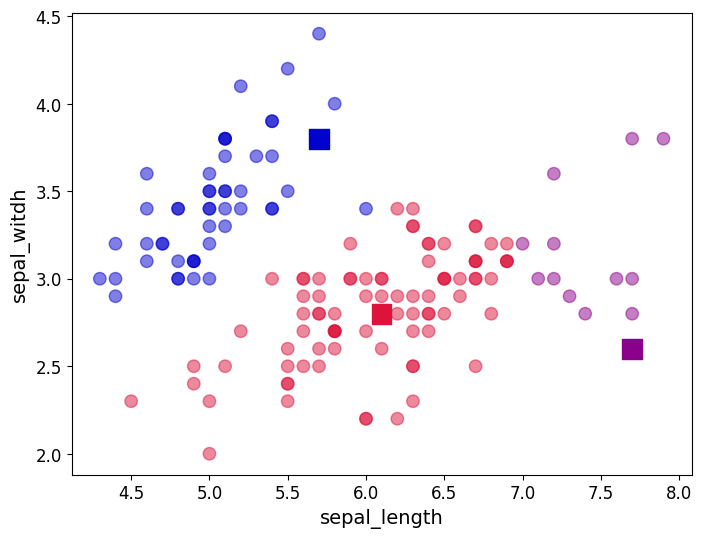

In [ ]:
# Visualizing Clustering Results with Centroids  

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure (8x6)  

# Scatter plot for data points, colored by assigned centroid  
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',  
            c=df['centroid'].astype('category'), cmap=customcmap,  
            s=80, alpha=0.5)  

# Scatter plot for centroids, marked as squares  
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  
            marker='s', s=200, c=[0, 1, 2], cmap=customcmap)  

ax.set_xlabel(r'sepal_length', fontsize=14)  # X-axis label  
ax.set_ylabel(r'sepal_width', fontsize=14)  # Y-axis label (Fixed typo)  
plt.xticks(fontsize=12)  # Set font size for X ticks  
plt.yticks(fontsize=12)  # Set font size for Y ticks  

plt.show()  # Display the plot  


In [ ]:
# Print the Total Error  

print("The total error is {0:.2f}".format(df['error'].sum()))  # Sum and display total error  


The total error is 91.88


In [ ]:
# Recalculate Centroids by Computing the Mean of Assigned Data Points  

centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop=True)  # Compute new centroids  
centroids  # Display updated centroids  


,sepal_length,sepal_width
0,6.068966,2.820690
1,5.036000,3.440000
2,7.438462,3.130769


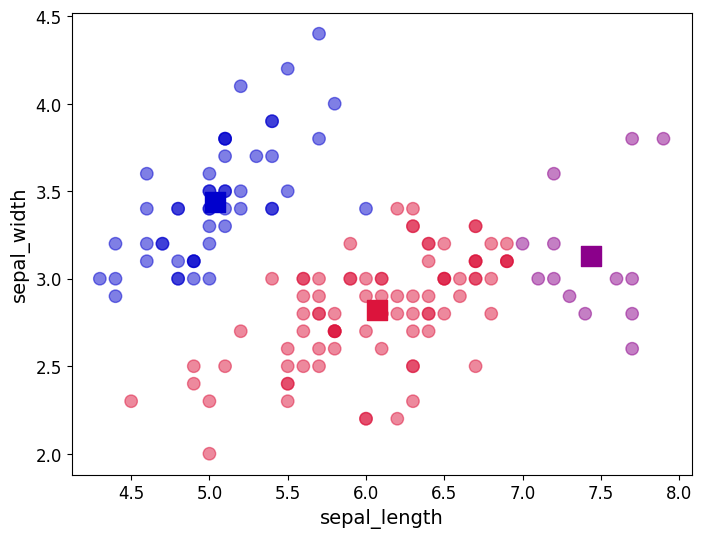

In [ ]:
# Visualizing Updated Clustering Results with New Centroids  

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure (8x6)  

# Scatter plot for data points, colored by assigned centroid  
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',  
            c=df['centroid'].astype('category'), cmap=customcmap,  
            s=80, alpha=0.5)  

# Scatter plot for updated centroids, marked as squares  
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  
            marker='s', s=200, c=[0, 1, 2], cmap=customcmap)  

ax.set_xlabel(r'sepal_length', fontsize=14)  # X-axis label  
ax.set_ylabel(r'sepal_width', fontsize=14)  # Y-axis label  
plt.xticks(fontsize=12)  # Set font size for X ticks  
plt.yticks(fontsize=12)  # Set font size for Y ticks  

plt.show()  # Display the plot  


In [ ]:
# K-Means Clustering Implementation  

def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means clustering implementation.  
    - dset: DataFrame with observations  
    - k: Number of clusters (default = 2)  
    - tol: Convergence tolerance (default = 1E-4)  
    '''
    # Create a copy to avoid modifying the original dataset  
    working_dset = dset.copy()

    # Variables to track error, stopping condition, and iteration count  
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initialize clusters by selecting centroids  
    centroids = initiate_centroids(k, dset)

    while goahead:
        # Step 3 & 4: Assign centroids and compute error  
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)  
        err.append(sum(j_err))  

        # Step 5: Update centroids based on new assignments  
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

        # Step 6: Check for convergence  
        if j > 0:
            # Stop if error change is below tolerance  
            if err[j - 1] - err[j] <= tol:
                goahead = False
        j += 1  

    # Final centroid assignment and update  
    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)  
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)  

    return working_dset['centroid'], j_err, centroids  # Return final assignments, errors, and centroids  


In [ ]:
# Run K-Means Clustering with k=3  

np.random.seed(42)  # Set seed for reproducibility  

# Apply K-Means to the dataset using 'sepal_length' and 'sepal_width'  
df['centroid'], df['error'], centroids = kmeans(df[['sepal_length', 'sepal_width']], 3)  

df.head()  # Display the first 5 rows  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19492\943611640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'], centroids = kmeans(df[['sepal_length','sepal_width']], 3)


,sepal_length,sepal_width,centroid,error
0,5.1,3.5,1,0.002116
1,4.9,3.0,1,0.011051
2,4.7,3.2,1,0.011954
3,4.6,3.1,1,0.045301
4,5.0,3.6,1,0.007762


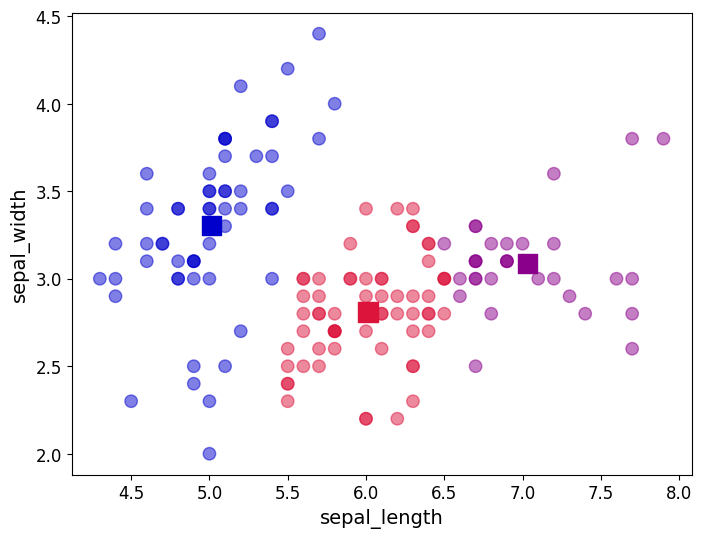

In [ ]:
# Visualizing Final Clustering Results with K-Means  

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure (8x6)  

# Scatter plot for data points, colored by assigned centroid  
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o',  
            c=df['centroid'].astype('category'), cmap=customcmap,  
            s=80, alpha=0.5)  

# Scatter plot for final centroids, marked as squares  
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  
            marker='s', s=200, c=[0, 1, 2], cmap=customcmap)  

ax.set_xlabel(r'sepal_length', fontsize=14)  # X-axis label  
ax.set_ylabel(r'sepal_width', fontsize=14)  # Y-axis label  
plt.xticks(fontsize=12)  # Set font size for X ticks  
plt.yticks(fontsize=12)  # Set font size for Y ticks  

plt.show()  # Display the final clustered plot  


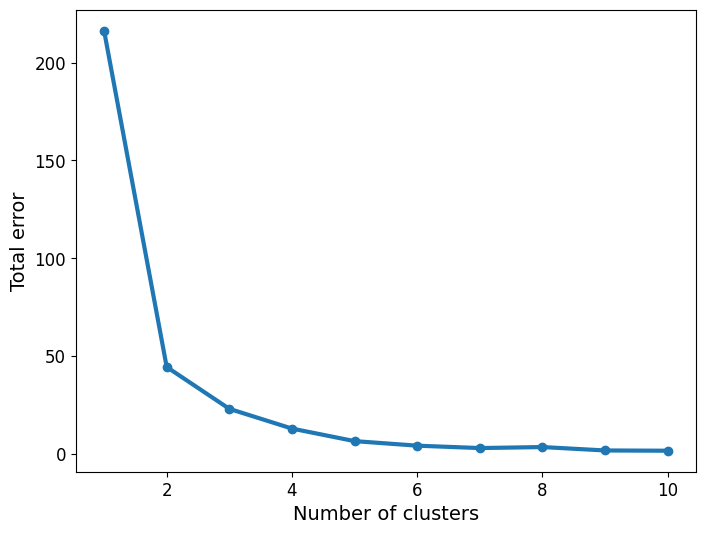

In [ ]:
# Elbow Method for Optimal Cluster Selection  

err_total = []  # List to store total errors  
n = 10  # Maximum number of clusters to test  

df_elbow = blobs[['sepal_length', 'sepal_width']]  # Select features for clustering  

# Run K-Means for cluster sizes from 1 to n  
for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)  
    err_total.append(sum(my_errs))  # Store total error  

# Plot the Elbow Curve  
fig, ax = plt.subplots(figsize=(8, 6))  
plt.plot(range(1, n+1), err_total, linewidth=3, marker='o')  

ax.set_xlabel(r'Number of clusters', fontsize=14)  # X-axis label  
ax.set_ylabel(r'Total error', fontsize=14)  # Y-axis label  
plt.xticks(fontsize=12)  # Set font size for X ticks  
plt.yticks(fontsize=12)  # Set font size for Y ticks  

plt.show()  # Display the Elbow Curve  
